In [4]:
import pandas as pd

df_real = pd.read_csv('/content/drive/MyDrive/News-_dataset/True.csv')

df_fake = pd.read_csv('/content/drive/MyDrive/News-_dataset/Fake.csv')

df_real['label'] = 0
df_fake['label'] = 1

df = pd.concat([df_real, df_fake], ignore_index=True)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Shape:", df.shape)
display(df.head())

Shape: (44898, 5)


,title,text,subject,date,label
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",1
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",1
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",1
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",0
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df['content'] = df['title'] + " " + df['text']

X_train, X_test, y_train, y_test = train_test_split(
    df['content'], df['label'], test_size=0.2, random_state=42
)

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)

model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.987750556792873


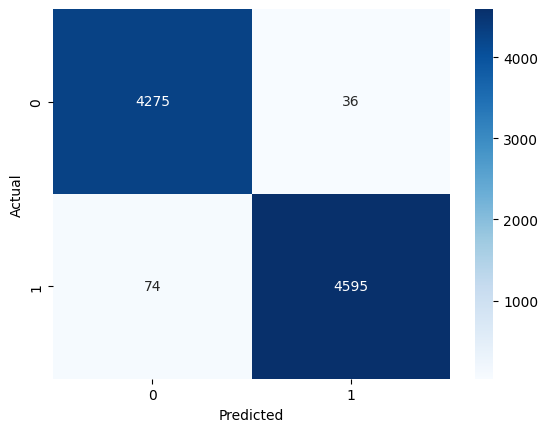

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4311
           1       0.99      0.98      0.99      4669

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred))

In [9]:
import joblib

joblib.dump(model, 'fake_news_model.pkl')

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [12]:
model = joblib.load('fake_news_model.pkl')
tfidf = joblib.load('tfidf_vectorizer.pkl')

def predict_news(text):
    vec = tfidf.transform([text])
    pred = model.predict(vec)[0]
    label = "Fake" if pred == 1 else "Real"
    print(f"News: {text}")
    print(f"Prediction: {label}")

predict_news("Breaking: Scientists discovered water on Mars!")
predict_news("Celebrity endorses new diet pill scam.")

News: Breaking: Scientists discovered water on Mars!
Prediction: Fake
News: Celebrity endorses new diet pill scam.
Prediction: Fake
